 # Lab 1
  
 ### By 👩‍Alejandra👩‍, 👧Lily👧 , and 👦Franklin👦
 
 MATH0154 Computational Statistics with Prof. 😂Gabe Chandler😂


In [22]:
h <- function(x) {
    # 
    # function with many local maxima, but only one global maximum
    # 
    # Args:
    #    x: value at which to evaluate the function   
    # Returns:
    #    y: value of the function evaluated at x, f(x)
    
  return(sin(10*x) - x^(2))
}


Explore <- function(x, tau, h, n_iter, eps){
    #
    # function that explores local neighborhood
    # Args:
    #    @param x: initial starting value
    #    @param tau: the value of tau for the short random walk
    #    @param h: function that we want to maximize
    #    @param n_iter: number of iterations to perform for this set value of tau.
    # Returns:
    #    y: resting location after a short random walk

  i <- 1
    
  while(i <= n_iter){
      
      y <- x + eps*runif(1,-1,1)
      val <- min(1, exp((h(y)-h(x))/tau)) #probability of moving
      
      if(runif(1)<val){ #update according to the probability
        x <- y
      }
      
  i <- i + 1 #update i
      
  }
    
  return(x)
}


SimAnnealing <-function(x, h, tau_range, n_iter, tau_length, eps){
    
    # function that finds the global maximum of a function using simulated annealing
    # 
    # Args:
    #    @param x: inital starting value
    #    @param h: function that we want to maximize
    #    @param n_iter: number of iterations
    #    @param tau_length: length of the cooling schedule
    #
    
  
  path <- c(x) #initialize the path as a vector of the seed value.
  tau <- exp(seq(tau_range[1], tau_range[2], length.out=tau_length)) # create a tau_schedule

  for(i in (2:length(tau) + 1)){ #for a tau in the tau schedule
    x <- explore(x, tau[i - 1], h, n_iter, eps) #run a short random walk
    path[i] <- x # store the value of x into the "path" of the walker
  }
  return(path)
}

Now that we have wrote our simulated annealing function, we will run it to find the global maximum of h(x). We will start the walker at $x = -10$. Our temperature will start at $10^{7}$ and drop to $10^{-4}$ in 1000 linearly-spaced steps. We will walk 100 times between each drop of the temperature. Our maxmimum step size will be 0.1 units.

[1] 0.1610027


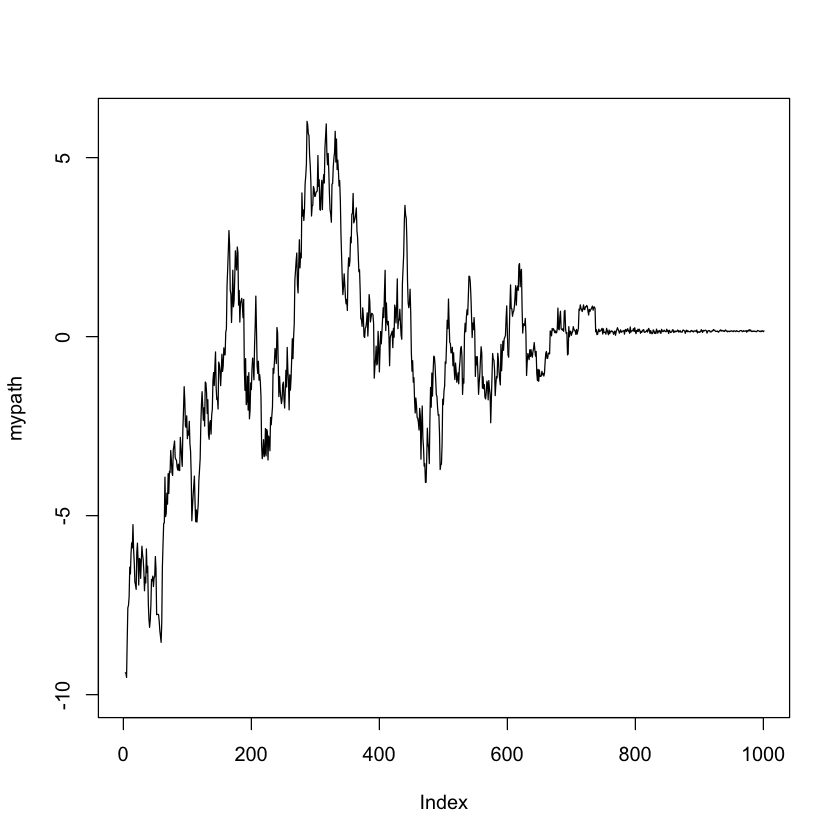

In [30]:
mypath <- SimAnnealing(-10,h,c(7,-4), 100, 1000, 0.1)
plot(mypath, type = 'l')
print(mypath[length(mypath)])

We find that the walker explores a wide range of values when the temperature is high, ranging from -10 to 5. After about 800 drops of the temperature, it eventually settles to a value of 0.0161. In the next plot, we will plot the solution as a vertical line, and the function (as a red line) and see if the global maximum.

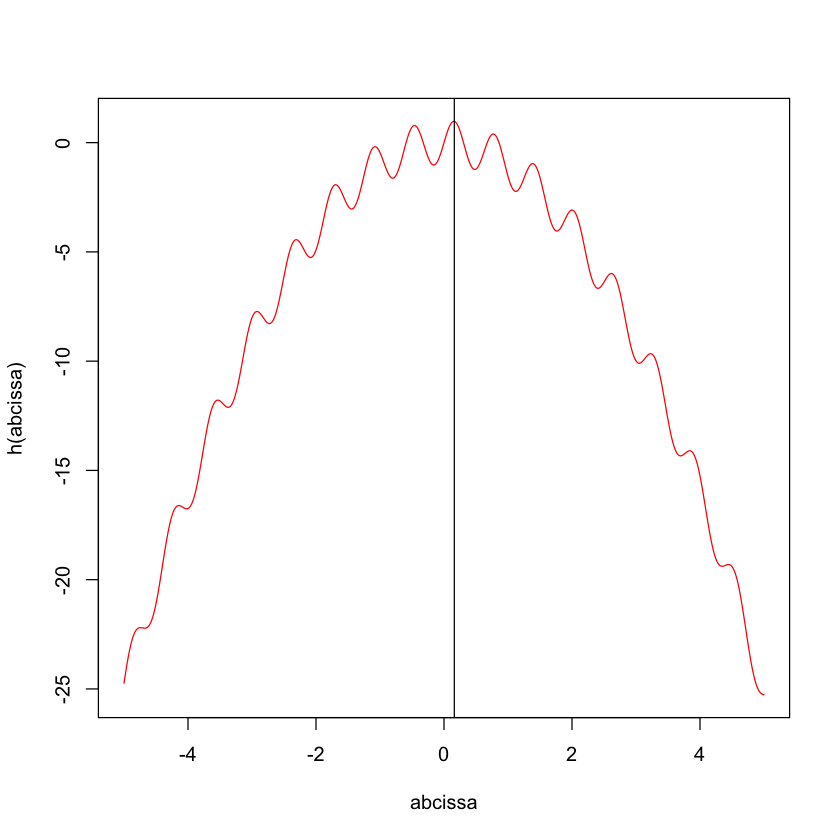

In [32]:
abcissa <- seq(-5,5,0.01)
plot(abcissa, h(abcissa), type = 'l', col = 'red')
abline(v = mypath[length(mypath)] )

Indeed, we have found the global maximum!